In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

In [118]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("mala1.txt", delimiter="\t",skip_footer=1)

d_sensor = array1
print("Sensor 1:",d_sensor)
print(len(d_sensor))


Sensor 1: [977. 981. 987. ... 816. 820. 816.]
14301


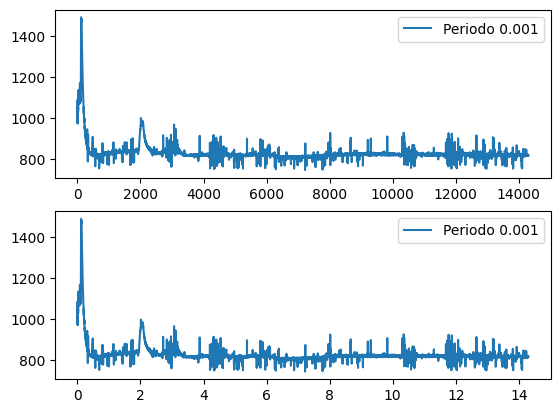

In [119]:
#eje de tiempo en seg
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
#d_sensor=d_sensor[0:2800]

#Los elementos ahora son los mismos para todas las señales
M = len(d_sensor)
n = np.arange(0,M)

t = n/Fs

#Señal en reposo
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor,label=f"Periodo {T1}")
axes[1].legend()

## DFT de N puntos

In [120]:
#transformada de fourier FFT
N1 = len(d_sensor)

D1 = np.fft.fft(d_sensor,N1)


D1 = D1[0:(N1//2)]

In [121]:
#magnitud para las cuatro señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)

#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

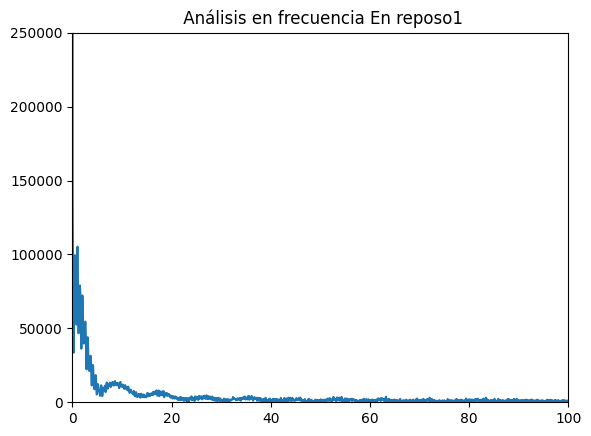

In [122]:
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.25*1e6])
plt.title(" Análisis en frecuencia En reposo1")

## Diseñar el filtro FIR pasa bajos

In [123]:
#Para el diseño del FIR vamos a incluir el diseño con la ventaba Blackman. Esto se realiza porque la atenuación que genera es mucho mayor que a
#las diferentes ventanas que se aplican
#longitud de la ventana
M = 100
#frecuencia de corte en Hz
Fc = 20 #Valor sugerido en la guia

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='blackman', fs=Fs)
w = np.round(w,3)

In [124]:
nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Text(0.5, 1.0, ' Análisis en frecuencia')

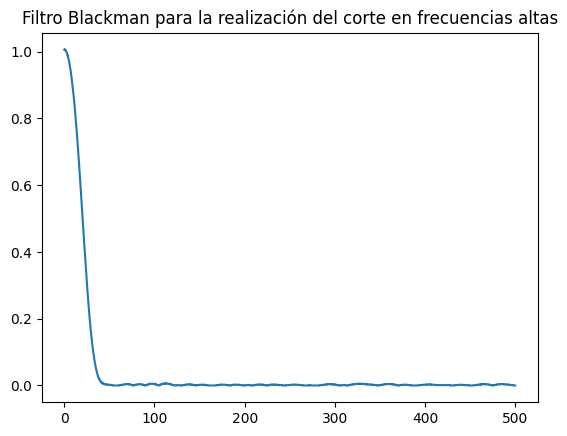

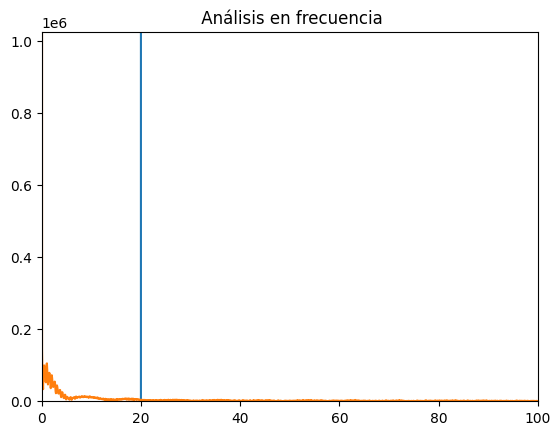

In [131]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Blackman para la realización del corte en frecuencias altas")

plt.figure()
plt.plot(Rx,Ry)
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,1.025*1e6])
plt.title(" Análisis en frecuencia")

### Aplicación del filtro FIR a la entrada de: sensor1,sensor2,sensor3,sensor4

In [126]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, np.array(1),d_sensor)

#Una vez realizada la convolución de las señales en el tiempo se realiza la DFT con el comando FFT para evaluar la salida filtrada por el 
#pasabajos.
Y1 = np.fft.fft(y1,N1)
Y1 = np.round(Y1[0:N1//2],3)
Ym1 = np.abs(Y1)



Text(0.5, 1.0, ' Análisis en frecuencia En reposo1 realizado el corte')

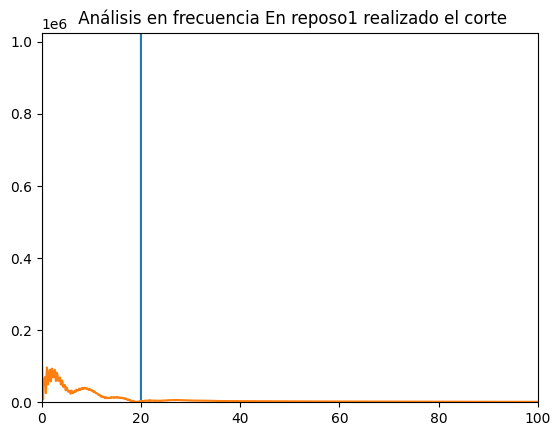

In [127]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym1)
plt.xlim([0,100])
plt.ylim([0,1.025*1e6])
plt.title(" Análisis en frecuencia En reposo1 realizado el corte")

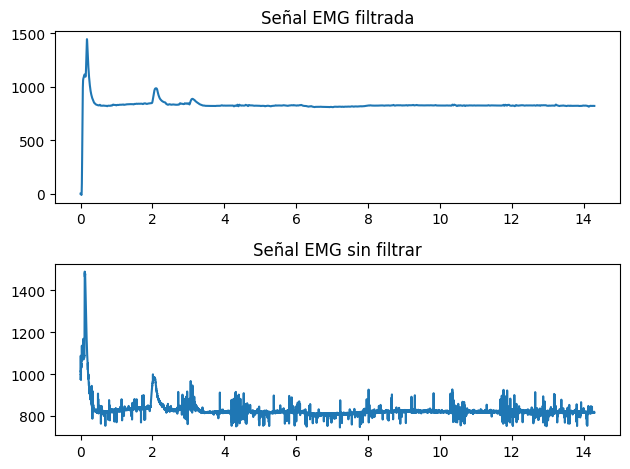

In [128]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(t, y1)
ax1.set_title('Señal EMG filtrada')

# Trazar en la segunda subparcela
ax2.plot(t, d_sensor)
ax2.set_title('Señal EMG sin filtrar')

# Ajustar el espaciado entre subparcelas
plt.tight_layout()

# Mostrar los gráficos

plt.show()

In [129]:
print(y1)
print(len(y1))
print(d_sensor)
print(len(d_sensor))

[  0.      0.      0.    ... 821.641 821.571 821.532]
14301
[977. 981. 987. ... 816. 820. 816.]
14301


In [130]:
import csv

# Array de ejemplo

# Nombre del archivo txt
filename = "fmala1.txt"

with open(filename, 'w') as file:
    for element in y1:
        file.write(str(element) + "\n")

print("Array guardado en el archivo de texto.")

Array guardado en el archivo de texto.
